Step 1: Load & Explore Data

In [74]:
# Imp0rt necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [75]:
# Load CSV file
data = pd.read_csv("C:\\Users\\1 Click\\Desktop\\CodeAlpha\\credit_scoring_dataset_expanded.csv")

# Display first few rows
data.head()


,Income,Debt,Payment_History,Loan_Amount,Debt_to_Income,Loan_to_Income,High_Debt_Flag,High_Loan_Flag,Age,Creditworthy
0,50000,10000,Good,15000,0,0,0,0,44,1
1,42000,11500,Good,12000,0,0,0,0,29,1
2,44500,15000,Average,20000,0,0,0,1,36,0
3,60000,5000,Good,10000,0,0,0,0,47,1
4,25000,12000,Bad,16500,0,0,1,1,29,0


Step 2: Data Cleaning

In [76]:
data.isnull().mean()*100

Income             0.0
Debt               0.0
Payment_History    0.0
Loan_Amount        0.0
Debt_to_Income     0.0
Loan_to_Income     0.0
High_Debt_Flag     0.0
High_Loan_Flag     0.0
Age                0.0
Creditworthy       0.0
dtype: float64

In [77]:
data.duplicated().sum()

np.int64(0)

In [78]:
# Dataset overview
data.info()
data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Income           4000 non-null   int64 
 1   Debt             4000 non-null   int64 
 2   Payment_History  4000 non-null   object
 3   Loan_Amount      4000 non-null   int64 
 4   Debt_to_Income   4000 non-null   int64 
 5   Loan_to_Income   4000 non-null   int64 
 6   High_Debt_Flag   4000 non-null   int64 
 7   High_Loan_Flag   4000 non-null   int64 
 8   Age              4000 non-null   int64 
 9   Creditworthy     4000 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 312.6+ KB


,Income,Debt,Payment_History,Loan_Amount,Debt_to_Income,Loan_to_Income,High_Debt_Flag,High_Loan_Flag,Age,Creditworthy
count,4000.000000,4000.000000,4000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
unique,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,73274.800250,32392.929750,NaN,43108.345500,0.209500,0.347000,0.479750,0.741500,41.220000,0.193750
std,38289.404518,23357.244654,NaN,28772.528503,0.581115,0.782141,0.499652,0.437865,13.832224,0.395285
min,5000.000000,60.000000,NaN,1592.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,41663.750000,12286.250000,NaN,17248.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000
50%,64811.500000,25521.000000,NaN,35645.000000,0.000000,0.000000,0.000000,1.000000,39.000000,0.000000
75%,104845.000000,51719.500000,NaN,68011.250000,0.000000,0.000000,1.000000,1.000000,52.000000,0.000000


Step 3: Encode Categorical Features

In [79]:
data['Payment_History'].value_counts()

Payment_History
Good       2249
Average    1068
Bad         683
Name: count, dtype: int64

In [80]:
le = LabelEncoder()
data['Payment_History'] = le.fit_transform(data['Payment_History'])

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Income           4000 non-null   int64
 1   Debt             4000 non-null   int64
 2   Payment_History  4000 non-null   int64
 3   Loan_Amount      4000 non-null   int64
 4   Debt_to_Income   4000 non-null   int64
 5   Loan_to_Income   4000 non-null   int64
 6   High_Debt_Flag   4000 non-null   int64
 7   High_Loan_Flag   4000 non-null   int64
 8   Age              4000 non-null   int64
 9   Creditworthy     4000 non-null   int64
dtypes: int64(10)
memory usage: 312.6 KB


Step 4: Split Data into Training and Testing Sets

In [82]:
# Separate features & target variable
X = data.drop("Creditworthy", axis=1)
y = data["Creditworthy"]

In [83]:
X

,Income,Debt,Payment_History,Loan_Amount,Debt_to_Income,Loan_to_Income,High_Debt_Flag,High_Loan_Flag,Age
0,50000,10000,2,15000,0,0,0,0,44
1,42000,11500,2,12000,0,0,0,0,29
2,44500,15000,0,20000,0,0,0,1,36
3,60000,5000,2,10000,0,0,0,0,47
4,25000,12000,1,16500,0,0,1,1,29
...,...,...,...,...,...,...,...,...,...
3995,100774,31169,2,68001,0,0,0,1,46
3996,141374,45641,2,63282,0,0,0,1,29
3997,106118,22990,2,9899,0,0,0,0,18
3998,80942,29661,2,33582,0,0,0,1,18


In [84]:
y

0       1
1       1
2       0
3       1
4       0
       ..
3995    0
3996    0
3997    1
3998    0
3999    0
Name: Creditworthy, Length: 4000, dtype: int64

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
print("Class distribution in Train:\n", y_train.value_counts(normalize=True))

Train shape: (3200, 9) Test shape: (800, 9)
Class distribution in Train:
 Creditworthy
0    0.80625
1    0.19375
Name: proportion, dtype: float64


Step 5:Model: Logistic Regression

In [86]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

print("Logistic Regression")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred,digits=4))

Logistic Regression
[[608  37]
 [ 93  62]]
              precision    recall  f1-score   support

           0     0.8673    0.9426    0.9034       645
           1     0.6263    0.4000    0.4882       155

    accuracy                         0.8375       800
   macro avg     0.7468    0.6713    0.6958       800
weighted avg     0.8206    0.8375    0.8230       800



Step 6: Model: Decision Tree Classifier

In [87]:
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train on training data
dt_clf.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_clf.predict(X_test)

print("Decision Tree Classifier")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, digits=4))

Decision Tree Classifier
[[596  49]
 [ 47 108]]
              precision    recall  f1-score   support

           0     0.9269    0.9240    0.9255       645
           1     0.6879    0.6968    0.6923       155

    accuracy                         0.8800       800
   macro avg     0.8074    0.8104    0.8089       800
weighted avg     0.8806    0.8800    0.8803       800



Step 7: Model: Random Forest Classifier

In [88]:
rf_clf = RandomForestClassifier( random_state=42, n_estimators=100)

# Train on training data
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)

print("Random Forest Classifier")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, digits=4))

Random Forest Classifier
[[613  32]
 [ 64  91]]
              precision    recall  f1-score   support

           0     0.9055    0.9504    0.9274       645
           1     0.7398    0.5871    0.6547       155

    accuracy                         0.8800       800
   macro avg     0.8227    0.7687    0.7910       800
weighted avg     0.8734    0.8800    0.8745       800



Step 8: ROC Curves

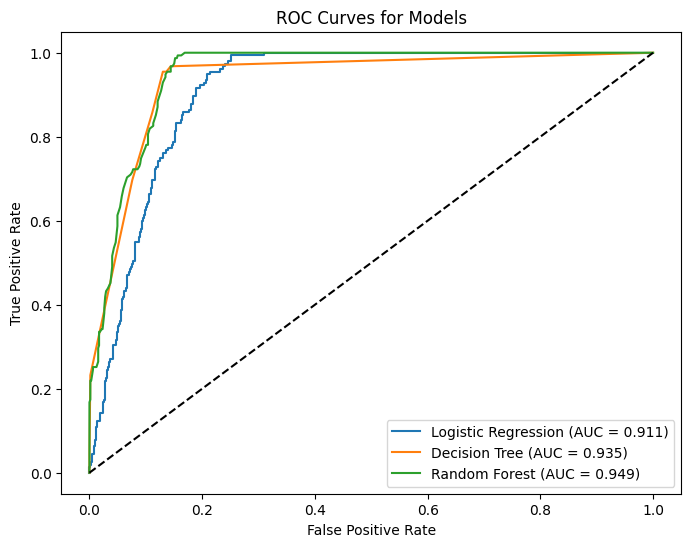

In [89]:
# Get predicted probabilities for ROC curves
y_proba_log = log_reg.predict_proba(X_test)[:,1]
y_proba_dt = dt_clf.predict_proba(X_test)[:,1]
y_proba_rf = rf_clf.predict_proba(X_test)[:,1]

# Compute ROC curves
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

# Compute AUC scores
auc_log = auc(fpr_log, tpr_log)
auc_dt = auc(fpr_dt, tpr_dt)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure(figsize=(8,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.3f})")
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")

plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Models")
plt.legend(loc="lower right")
plt.show()


Step 9: Feature Importance (Random Forest)

Top Features by Importance:

           Feature  Importance
3      Loan_Amount    0.286087
1             Debt    0.222856
0           Income    0.159792
8              Age    0.095928
2  Payment_History    0.077405
7   High_Loan_Flag    0.070798
6   High_Debt_Flag    0.068728
5   Loan_to_Income    0.011300
4   Debt_to_Income    0.007106


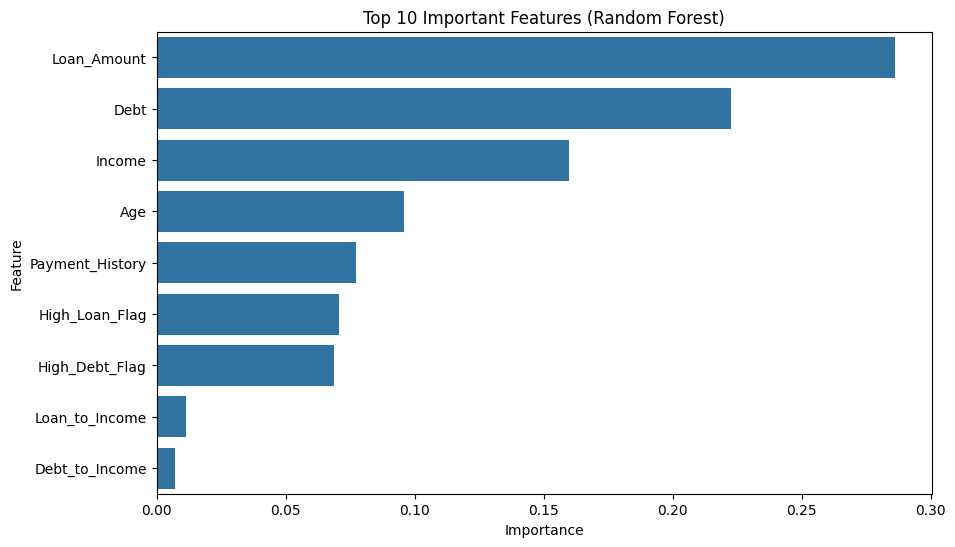

In [90]:
# Get feature importances from Random Forest
importances = rf_clf.feature_importances_
features = X.columns

# Create DataFrame for better visualization
feat_imp = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print("Top Features by Importance:\n")
print(feat_imp.head(10))

# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(10))
plt.title("Top 10 Important Features (Random Forest)")
plt.show()


Step 10: Save Models

In [91]:
# Save Logistic Regression
joblib.dump(log_reg, "logistic_regression_model.joblib")

# Save Decision Tree
joblib.dump(dt_clf, "decision_tree_model.joblib")

# Save Random Forest
joblib.dump(rf_clf, "random_forest_model.joblib")

print("✅ Models saved successfully!")


✅ Models saved successfully!
